# Word Embedding: Word2Vec, GloVe

## Word Embedding
* 자연어가 단어들을 정보의 기본 단위로 한 sequence라고 할 때, 각 단어들을 특정 dimension으로 이루어진 공간 상의 한 점 또는 그 점의 좌표를 나타내는 vector로 변환해주는 기법
  * ex) "kitty" -> 3D : [2, 3, 5]
* input : training data, dimension
* output : 각 단어에 대한 최적의 좌표값 또는 그에 해당하는 vector 출력형
* 비슷한 의미를 가지는 단어가 좌표 공간상에 비슷한 위치의 점으로 mapping 되도록 함으로써 단어들의 의미상의 유사도를 잘 반영한 vector 표현을 다양한 자연어 처리 알고리즘에게 제공하는 역할을 함
  * 다양한 자연어 처리에서 보다 쉽게 성능을 올릴 수 있는 여건을 제공함
  * ex) 
    * 'cat', 'kitty' : 의미가 유사함 -> short distance
    * 'hamburger', 'cat' / 'hamburger', 'kitty' : 의미가 다름 -> far distance



## Word2Vec
* Word Embedding을 학습하는 방법 중 하나
* 주변 단어들을 숨긴 채 input으로 특정 단어를 받았을 때, 주변 단어들을 예측하는 방향으로 학습함
* 같은 문장에서 인접한 단어들 간에 의미가 비슷할 것이라고 가정함
* 한 단어가 주변에 등장하는 단어들을 통해 그 의미를 알 수 있음
  * ex)
    * The cat purns.
      * 'The', 'purns'가 'cat'과 의미적으로 관련성이 높다고 추측
    * This cat hunts mice.
      * 'This', 'hunts', 'mice'가 'cat'과 의미적으로 관련성이 높다고 추측
    * 'The', 'This' : 'cat'을 꾸며주는 관계
    * 'purns', 'hunts' : 'cat'이 할만한 행동
    * 'mice' : 'cat'이 'hunts'라는 행동을 할 때, 대상으로서 'cat'과 관계를 가지는 단어
* 학습 데이터를 바탕으로 'cat' 주변의 단어들의 확률 분포를 예측함
  * input : 'cat'

### Word2Vec Algorithm
* example
  * one sentence : "I study math."
* Step 1. tokenization & make vocabulary
  * Vocabulary : {"I", "study", "math"}
  * word -> one-hot vector : dimension = vocabulary size
    * "I" : [1, 0, 0], "study" : [0, 1, 0], "math" : [0, 0, 1]
* Step 2. sliding window기법을 적용하여 특정단어 앞 뒤로 나타난 단어와 입출력 단어쌍을 구성함
  * window size : 3인 경우, 앞 뒤로 한 단어씩 만을 봄
    * "I"가 중심인 경우 앞의 단어는 없고 뒤의 단어("study")만 있기 때문에 입출력 단어쌍 : ("I", " study") 을 구성함
    * window를 한 단어 옆으로 옮겨서(sliding window) "study"가 중심인 경우 입출력 단어쌍 ("study", "I"), ("study", "math") 을 구성함
  => Word2Vec의 학습데이터를 구성함

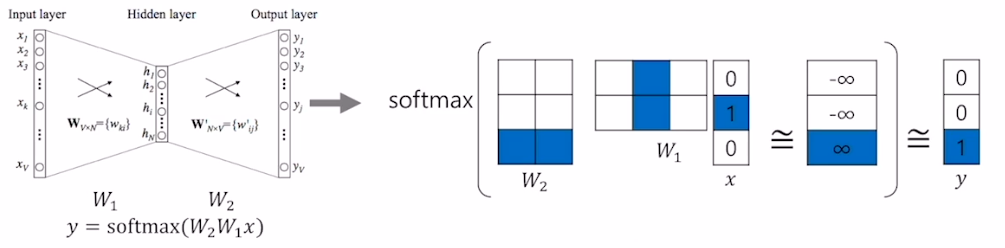
* $W$ : Linear Transform Matrix
  * $W_1$ : Input layer vector의 dimension을 hidden layer dimension으로 변환
  * $W_2$ : hidden layer vector의 dimension을 Output layer dimension으로 변환
* two-layer neural network
  * 입출력 단어쌍들에 대해 예측 task를 수행함
  * 입력/출력의 node 수 : dimension의 수(입출력 각각)
  * input : input word, output : output word
  * hidden layer node 수 : 사용자가 정하는 hyperparameter, word embedding을 수행하는 어떤 좌표공간의 dimension 수와 동일함(=number of embedding dimension)

* Step 3. $\mathrm{softmax}$ loss를 적용하여 output vector가 특정한 확률 분포값을 나타내도록 변환시킴
  * output의 확률분포와 target의 확률분포의 거리가 가깝도록 $W_1$, $W_2$를 학습을 진행함
  * ex) training data 중 ("study", "math")로 학습하는 경우 "study"를 input으로 하여 출력된 결과와 "math"의 확률분포가 가까워지도록 $W_1$, $W_2$를 학습함
  * $W_1$와 Input vector로 연산을 하는경우, input vector가 one-hot vector이기 때문에 $W_1$에서 input vector가 1에 해당하는 자리의 값만 추출하는 것과 같음
  * Embedding Layer : one-hot vector와 첫 번째 선형변환 matrix가 곱해지는 과정, 실제로 행렬곱을 수행하지 않고 one-hot vector의 1의 값을 가지는 index에 해당하는 $W_1$ 값을 뽑아옴
  * $W$와 input을 계산한 결과를 $\mathrm{softmax}$를 통과하여 확률분포를 출력함, 이 확률분포가 ground truth label(target)과 최대한 가까워야 함
    * ground truth 자리에 해당하는 내적값이 $\infty$, 그 외의 내적값이 $-\infty$ 일 때, ground truth 와 최대한 가까워짐
    *  $W_1$과 input 단어와의 유사도를 크게 만들고, $W_2$와 output 단어를 제외한 다른 단어와의 유사도를 작게 만들도록 조정하며 학습함


### Property of Word2Vec
* 단어 간의 의미론적 관계를 vector embedding의 결과에 잘 학습되어 있음

* 단어는 달라도 남성에서 여성으로 변화를 의미하는 단어들의 vector가 일관되도록 유지됨
  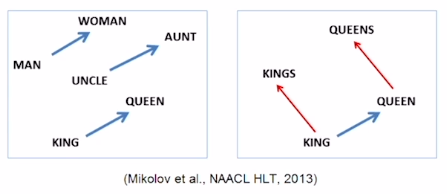

* 참고 자료
  * http://ronxin.github.io/wevi/
    * Weight Matrices 확인 가능
  * http://w.elnn.kr/search
    * Korean Word2Vec
  * http://wonjarkim.com/archives/50

* Word intrusion detection
  * https://github.com/dhammack/Word2VecExample
  * 주어진 여러 단어 중에 의미가 가장 상이한 하나의 단어를 찾는 task
    * 각 단어별로 euclid distance를 계산하여 평균값을 구함(평균 거리)
    * 평균 거리가 가장 큰 단어를 고름

* Word2Vec은 단어 자체의 의미를 파악하는 task 이외에도 다양한 자연어처리 task에서 자연어를 word 단위의 vector로 나타내어 task의 input으로 제공함
  * Word similarity
  * Machine translation
    * 서로 다른 언어들 간에 같은 의미를 가지는 word들의 embedding vector가 쉽게 align될 수 있도록 하여 번역의 성능을 높여줌 
  * Part-of-speech (PoS) tagging
  * Named entity recognition (NER)
  * Sentiment analysis
    * 단어들의 긍/부정의 의미를 보다 용이하게 파악할 수 있도록 word 들의 vector 표현형을 제공해줌
  * Clustering
  * Semantic lexicon building
  * Image Captioning
    * 주어진 이미지의 상황을 잘 이해하여 이에 대한 설명을 자연어 형태로 생성

## GloVe
* GLobal Vectors for Word Representation
* Word Embedding을 학습하는 방법 중 하나
* 학습 데이터에서 input과 output 단어가 한 window 내에서 몇 번 동시에 등장했는지 사전에 계산하고, input word embedding vector $u_i$와 output word embedding vector $v_j$의 내적값에서 두 단어가 하나의 window 내에서 몇 번 등장했는지에 대한 값에 log를 취한 값을 빼줌으로서 값에 정확히 fitting될 수 있도록 하는 loss function을 사용함
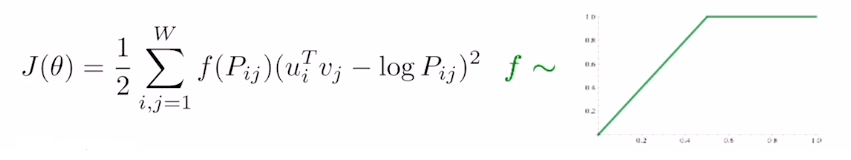
* 중복되는 계산을 줄여줌으로서 Word2Vec보다 빠르게 학습될 수 있고, 보다 적은 data에서도 잘 동작함

### Property of GloVe
* Linear Substruction
  * 성별만 다른 동일한 의미를 가진 단어를 PCA 방법을 통해 2차원으로 나타냄
    * 성별의 차이가 대략적으로 일정한 방향과 크기를 가지는 vector들로 나타남
  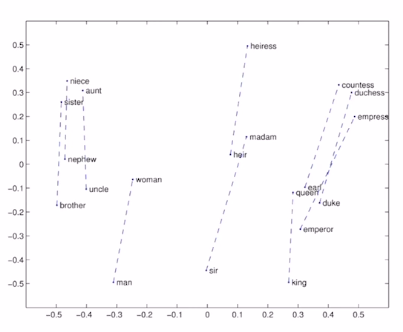